# Statistical Thinking in Python Part II.

### Acknowledgement
<a id='https://app.datacamp.com/learn/courses/statistical-thinking-in-python-part-2'>DataCamp</a>

### Table of Contents

## Parameter Estimation by Optimization

Datasets in Usage
- `ml_nohitters.csv`
- `female_literacy_fertility.csv`

### Example 1: How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If we assume that no-hitters are described as a **Poisson process**, then the time between no-hitters is **Exponentially** distributed. As we have seen, the ___Exponential distribution___ has a single parameter, which we will call $\tau$, the typical interval time. The value of the parameter  that makes the exponential distribution best match the data is the mean interval time (where time is in units of *number of games*) between no-hitters.

In the following, we will

- Compute the mean time (in units of number of games) between no-hitters.
- Draw 100,000 samples from an Exponential distribution with the parameter we computed from the mean of the inter-no-hitter times.
- Plot the theoretical PDF using plt.hist() and see whether our obsevations match with the theoretical curve or not.

In [1]:
from embedded_data import nohitter_times
from viz_helper import ecdf, ecdf_plot

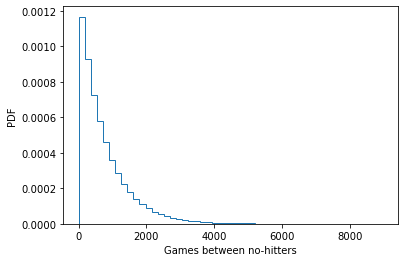

In [2]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100_000)

# Plot the PDF and label axes
plt.figure()
_ = plt.hist(inter_nohitter_time,
             bins=50, 
             density=True, 
             histtype='step')

_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')



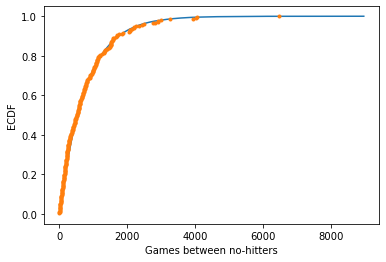

In [4]:
# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# CDF curve for theoretical calcs
plt.plot(x_theor, y_theor)

# CDF scatters for observations
ecdf_plot(nohitter_times, 'Games between no-hitters')

___Comment:___ It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.